In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,SpatialDropout1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
#df=pd.read_csv("https://raw.githubusercontent.com/AdrielC/autotradeR/master/Data/autoTradeR-2018-06-17-Private")

In [49]:
#df.to_csv("private_2018_car.csv")

In [64]:
df=pd.read_csv("private_2018_car.csv")
df.dropna(axis=0,subset=["carFeaturesText","listing_title"],inplace=True)

df["carFeaturesText"]=df["listing_title"]+" "+df["carFeaturesText"]


In [65]:
print(df.head(3))

   Unnamed: 0  red  green  blue  rowNum  \
0           0  227     19    19       1   
1           1    5     81   141       2   
2           2  227     19    19       3   

                               listing_title  listing_distance_miles  \
0    Used 2014 Jeep Wrangler Unlimited Sport                     0.0   
1     Used 2015 Jeep Wrangler Willys Wheeler                    12.0   
2  Used 2016 Jeep Wrangler Unlimited Rubicon                    15.0   

                                         listing_url    price  \
0  /cars-for-sale/vehicledetails.xhtml?listingId=...  51000.0   
1  /cars-for-sale/vehicledetails.xhtml?listingId=...  21999.0   
2  /cars-for-sale/vehicledetails.xhtml?listingId=...  80000.0   

   listingPriceRedu  ...          Dealer              model    year  \
0             False  ...  Private Seller    Unlimited Sport  2014.0   
1             False  ...  Private Seller     Willys Wheeler  2015.0   
2             False  ...  Private Seller  Unlimited Rubicon  201

Index(['Unnamed: 0', 'red', 'green', 'blue', 'rowNum', 'listing_title',
       'listing_distance_miles', 'listing_url', 'price', 'listingPriceRedu',
       'Body Style', 'Drive Type', 'Engine', 'Mileage', 'Transmission',
       'ATC Car ID', 'Fuel', 'Stock #', 'VIN', 'carFeaturesText', 'exterior',
       'interior', 'sellerComment', 'Basic Warranty', 'Corrosion Warranty',
       'Drivetrain Warranty', 'Roadside Assistance Warranty',
       'newListingIndicator', 'Dealer', 'model', 'year', 'ownershipStatus',
       'Location', 'sellerType', 'DriveTypeGeneral', 'numWordsinComment',
       'CityMpg', 'HyMpg'],
      dtype='object')


C:\Users\dnishimoto\AppData\Local\Temp\ipykernel_13548\536047693.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['price_group'] = pd.cut(df_prices['price'], 10)
C:\Users\dnishimoto\AppData\Local\Temp\ipykernel_13548\536047693.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['milage_group']=pd.cut(df_prices["Mileage"],10)


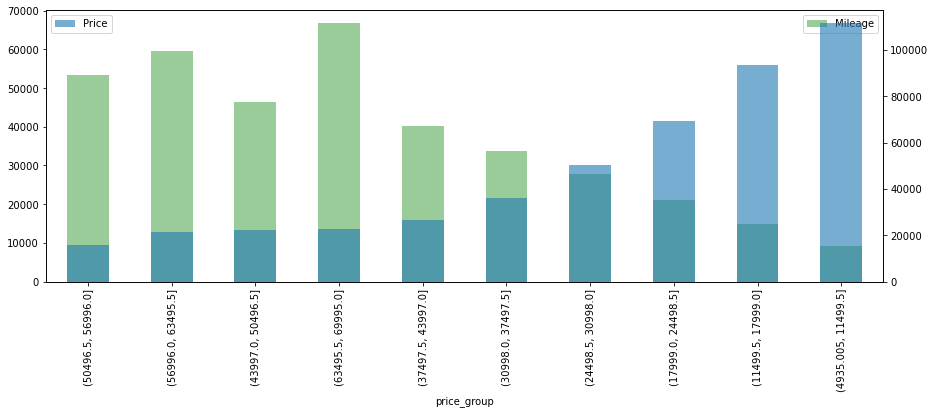

In [66]:
print(df.columns)
mask=df.applymap(np.isreal)

df=df[mask["Mileage"]]

filter=(df["price"]<70000) & (df["Mileage"]<150000) 
df_prices=df[filter]

df_prices['price_group'] = pd.cut(df_prices['price'], 10)
df_prices['milage_group']=pd.cut(df_prices["Mileage"],10)

df_price_grouped = df_prices.groupby('price_group').mean()
df_mileage_grouped = df_prices.groupby('price_group').mean()

#print(mask)'
plt.figure(figsize=(15, 5))

df_price_sorted=df_price_grouped.sort_values(by="Mileage")
df_mileage_sorted=df_mileage_grouped.sort_values(by="Mileage")

df_price_sorted['price'].plot(kind="bar",label="Mileage",color="green",alpha=0.4)
plt.xticks(rotation=90)
plt.legend()
twinx=plt.twinx()
df_mileage_sorted['Mileage'].plot(ax=twinx,kind="bar",label="Price",alpha=0.6)
plt.legend()
plt.show()

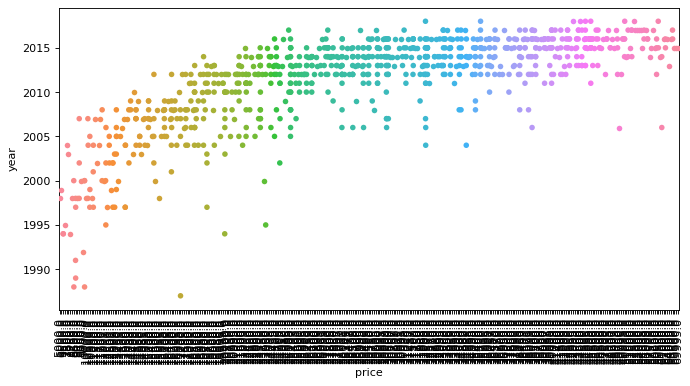

C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dni

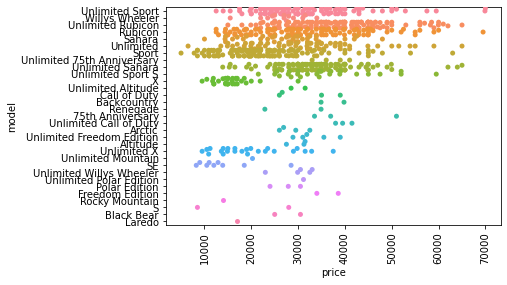

In [58]:
plt.figure(figsize=(10, 5), dpi=80)
sns.stripplot(data=df_prices, y="year", x="price",jitter=True)
plt.xticks(rotation=90)
plt.show()

sns.swarmplot(data=df_prices, y="model", x="price")
plt.xticks(rotation=90)
plt.show()

In [67]:

#df_prices["carFeaturesText"]=df_prices["carFeaturesText"].fillna("")
print(df_prices["carFeaturesText"])

0      Used 2014 Jeep Wrangler Unlimited Sport Backup...
1      Used 2015 Jeep Wrangler Willys Wheeler Bluetoo...
3      Used 2014 Jeep Wrangler Unlimited Rubicon Back...
4      Used 2006 Jeep Wrangler CD PlayerPremium Audio...
5      Used 2012 Jeep Wrangler Rubicon Bluetooth Hand...
                             ...                        
994    Used 2005 Jeep Wrangler Sport CD PlayerCruise ...
996    Used 2012 Jeep Wrangler Sport CD PlayerCruise ...
997    Used 2006 Jeep Wrangler Unlimited Sport CD Pla...
998    Used 2011 Jeep Wrangler Unlimited CD PlayerCru...
999    Used 2012 Jeep Wrangler Arctic Bluetooth Hands...
Name: carFeaturesText, Length: 900, dtype: object


In [68]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

y = pd.get_dummies(df_prices['price_group']).values
print('Shape of label tensor:', y.shape)

LABELS=sorted(df_prices['price_group'].unique())

print(y)
print(LABELS)

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_prices["carFeaturesText"].values)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(df_prices["carFeaturesText"].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)

Shape of label tensor: (900, 10)
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[Interval(4935.005, 11499.5, closed='right'), Interval(11499.5, 17999.0, closed='right'), Interval(17999.0, 24498.5, closed='right'), Interval(24498.5, 30998.0, closed='right'), Interval(30998.0, 37497.5, closed='right'), Interval(37497.5, 43997.0, closed='right'), Interval(43997.0, 50496.5, closed='right'), Interval(50496.5, 56996.0, closed='right'), Interval(56996.0, 63495.5, closed='right'), Interval(63495.5, 69995.0, closed='right')]
Shape of data tensor: (900, 250)


In [69]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(LABELS), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 100
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/100
12/12 [==============================] - 8s 628ms/step - loss: 1.6403 - accuracy: 0.3635 - val_loss: 1.5505 - val_accuracy: 0.3086
Epoch 2/100
12/12 [==============================] - 8s 679ms/step - loss: 1.5824 - accuracy: 0.3690 - val_loss: 1.5434 - val_accuracy: 0.3086
Epoch 3/100
12/12 [==============================] - 8s 662ms/step - loss: 1.5476 - accuracy: 0.3882 - val_loss: 1.4648 - val_accuracy: 0.3580
Epoch 4/100
12/12 [==============================] - 8s 681ms/step - loss: 1.4907 - accuracy: 0.4102 - val_loss: 1.4938 - val_accuracy: 0.3951
Epoch 5/100
12/12 [==============================] - 8s 684ms/step - loss: 1.4474 - accuracy: 0.4225 - val_loss: 1.4306 - val_accuracy: 0.4074
Epoch 6/100
 2/12 [====>.........................] - ETA: 7s - loss: 1.3837 - accuracy: 0.4453

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
def GetCategory(pred,LABELS):
    returnVal=[]
    curr_index=0
    curr_val=0
    for item in pred:
        val=max(item)
        index=list(item).index(val)
        #print(val,LABELS[index])
        if val>curr_val:
            curr_index=index
            curr_val=val
            
    return LABELS[curr_index]
    #returnVal.append(LABELS[np.argmax(np.array(item))])
    #return returnVal
        
for key,item in df_prices.iterrows():
    data=[]
    data.append(item['carFeaturesText'])
    seq = tokenizer.texts_to_sequences(data)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)
    print(pred)
    category=LABELS[np.argmax(pred)]
    print(data, "\n[predicted category]", category, "\n[actual category]",item['price_group'])